In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [182]:
ticker = input("Enter a stock ticker (e.g AMZN)").upper()
start_date = input("Enter the start date for the stock you want to analyse (YYYY-MM-DD)")
end_date = input("Enter the end date for the stock you want to analyse (YYYY-MM-DD)")

Enter a stock ticker (e.g AMZN) AMZN
Enter the start date for the stock you want to analyse (YYYY-MM-DD) 2019-09-17
Enter the end date for the stock you want to analyse (YYYY-MM-DD) 2024-09-13


In [186]:
stock_data = yf.download(ticker, start=start_date, end=end_date)
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-09-17  90.353996  91.199501  90.205002  91.127502  91.127502   39648000
2019-09-18  90.851997  91.102997  89.775002  90.873001  90.873001   50112000
2019-09-19  91.051003  91.628502  90.894997  91.074997  91.074997   40630000
2019-09-20  91.085503  91.531502  89.045998  89.708000  89.708000  106838000
2019-09-23  88.849998  89.635002  88.365997  89.264999  89.264999   58446000


### Data Cleaning

In [199]:
# Cleaning of the data
stock_data = stock_data.dropna()
stock_data = stock_data.drop_duplicates()
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#print(stock_data)

### Visualization of stock over time

The highest price the stock ever reached in the last 5 years was 201.1999969482422 on 7-8-2024
The lowest price the stock ever reached in the last 5 years was 81.30149841308594 on 3-16-2020


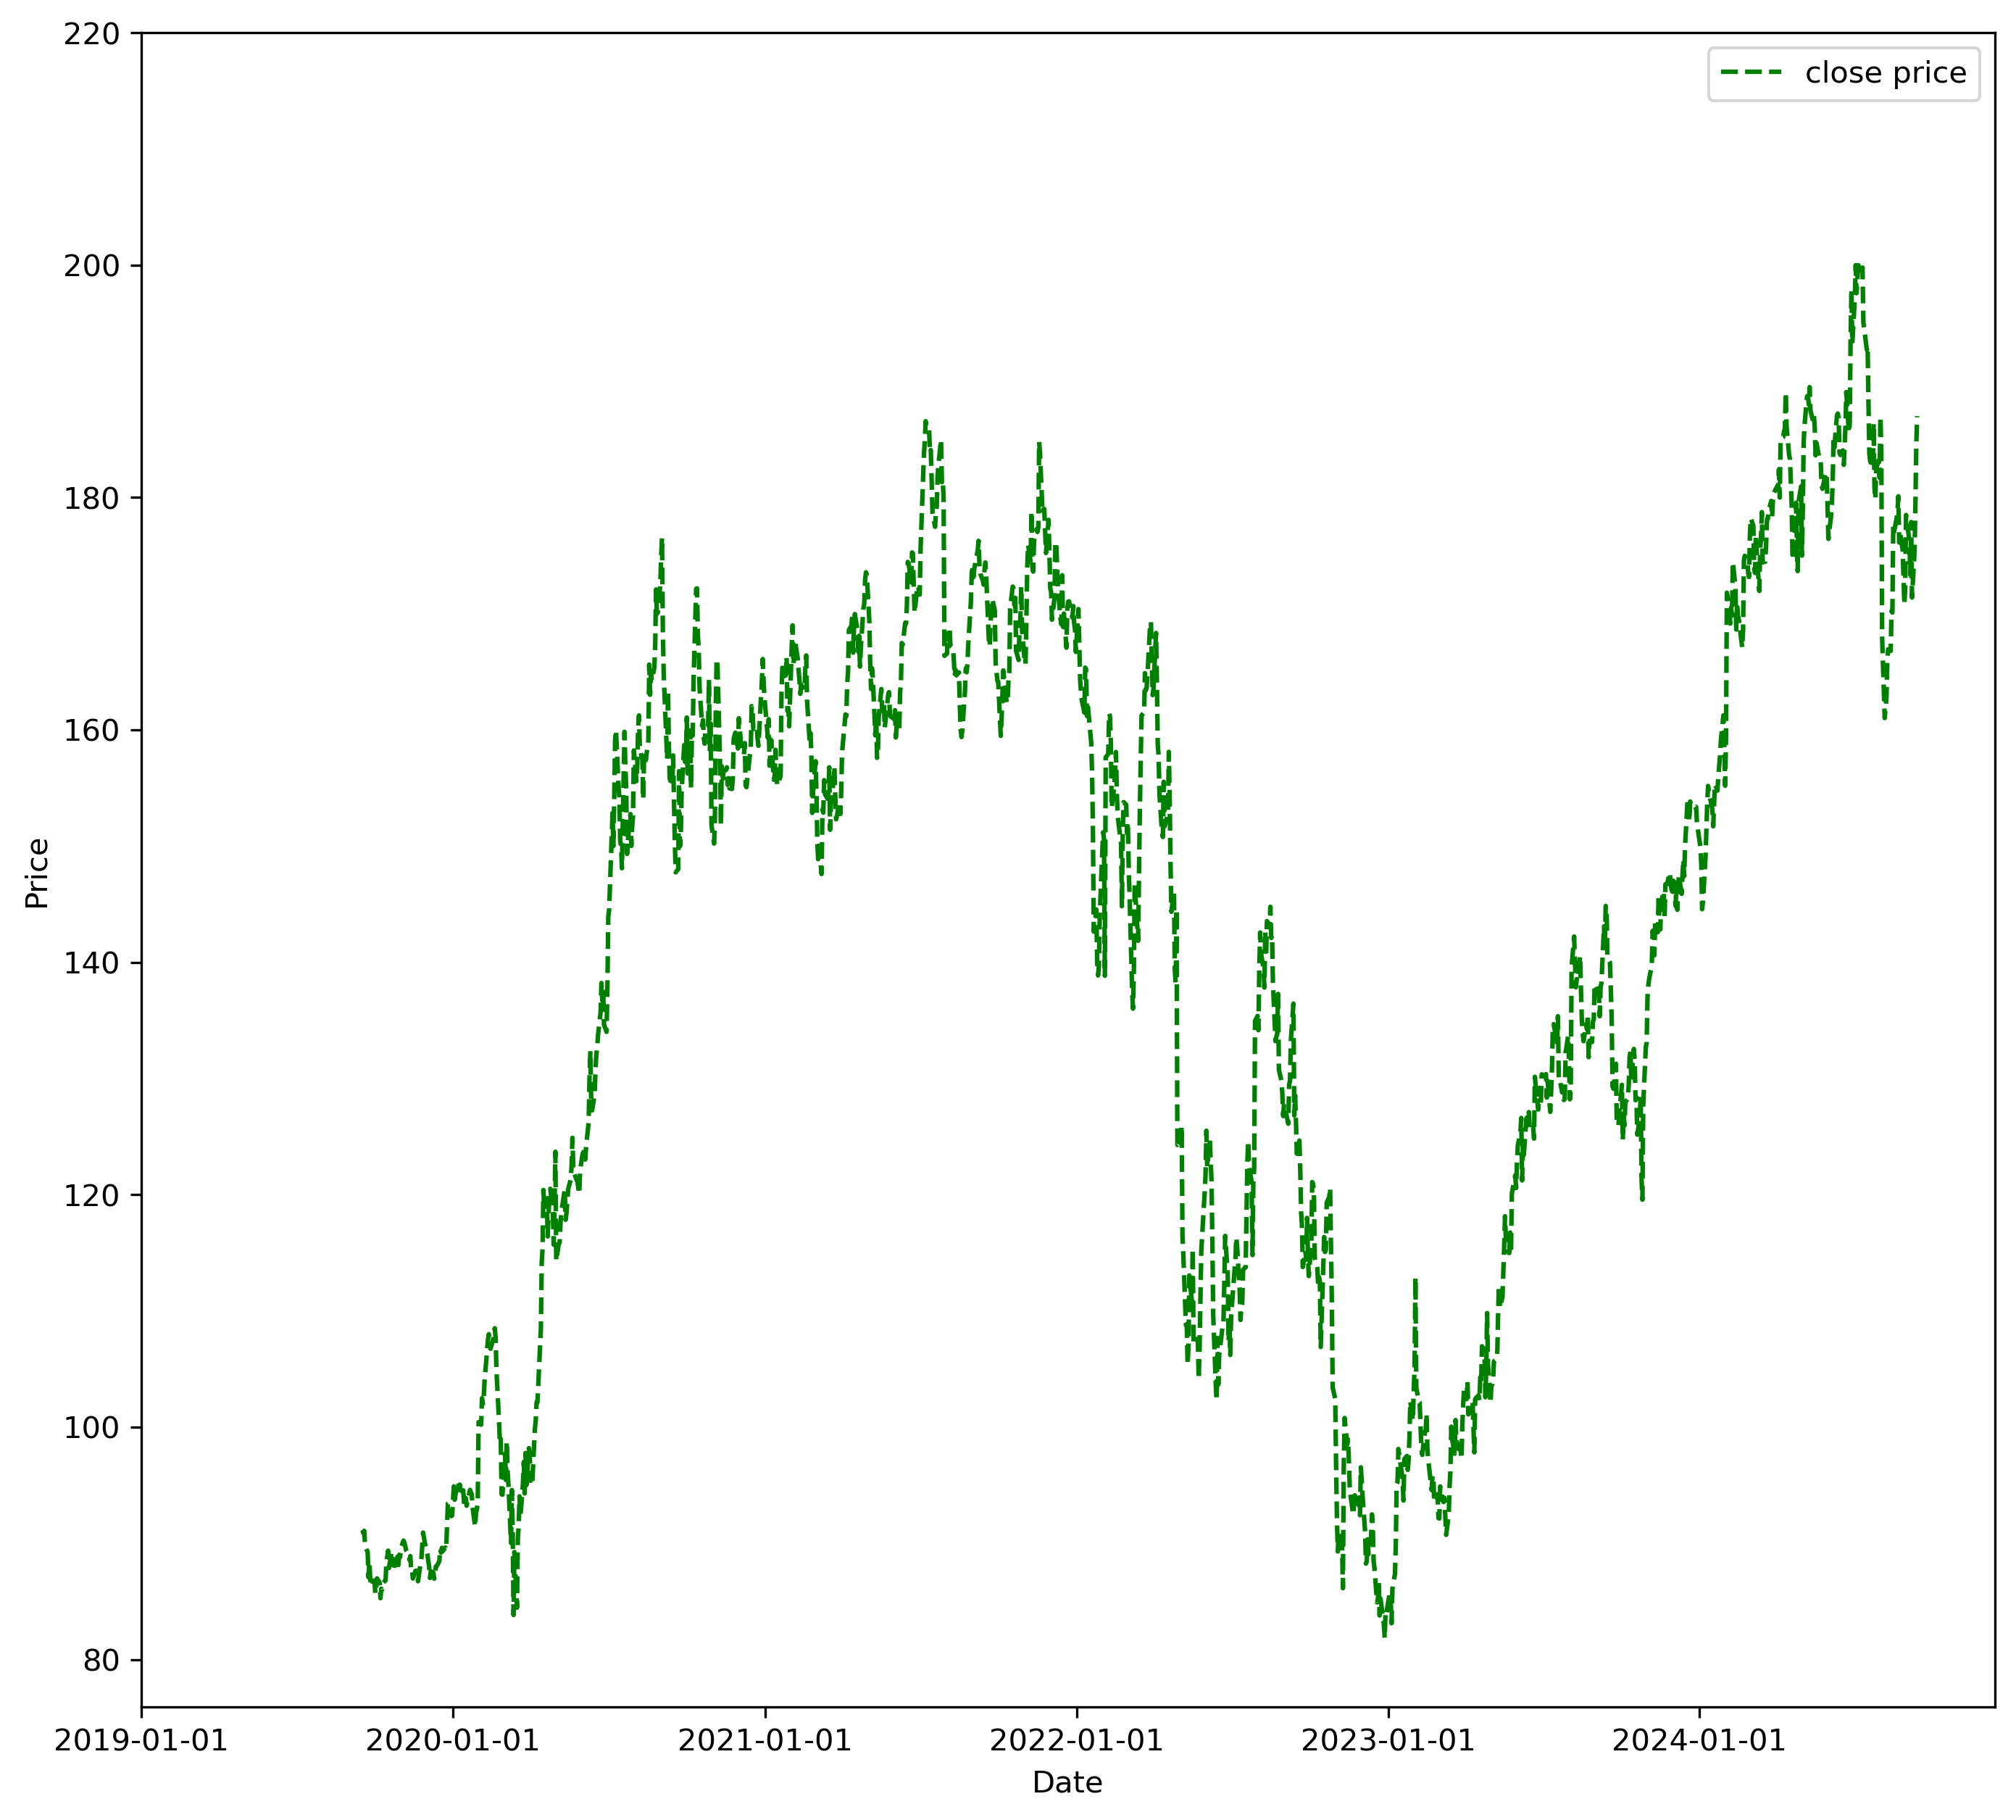

In [192]:
# Visualization of stock price over time
plt.figure(figsize=(11,10), dpi = 300)
plt.plot(stock_data.index, stock_data['Close'], 'g--', label = 'close price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(['2019','2020','2021','2022','2023','2024'])
plt.yticks([80,100,120,140,160,180,200,220])
highest_price = stock_data['High'].max()
highest_price_date = stock_data['High'].idxmax().strftime('%m-%d-%Y').lstrip('0').replace('-0','-')
lowest_price = stock_data['Low'].min()
lowest_price_date = stock_data['Low'].idxmin().strftime('%m-%d-%Y').lstrip('0').replace('-0','-')
print(f"The highest price the stock ever reached in the last 5 years was {highest_price} on {highest_price_date}")
print(f"The lowest price the stock ever reached in the last 5 years was {lowest_price} on {lowest_price_date}")
plt.legend()
plt.show()

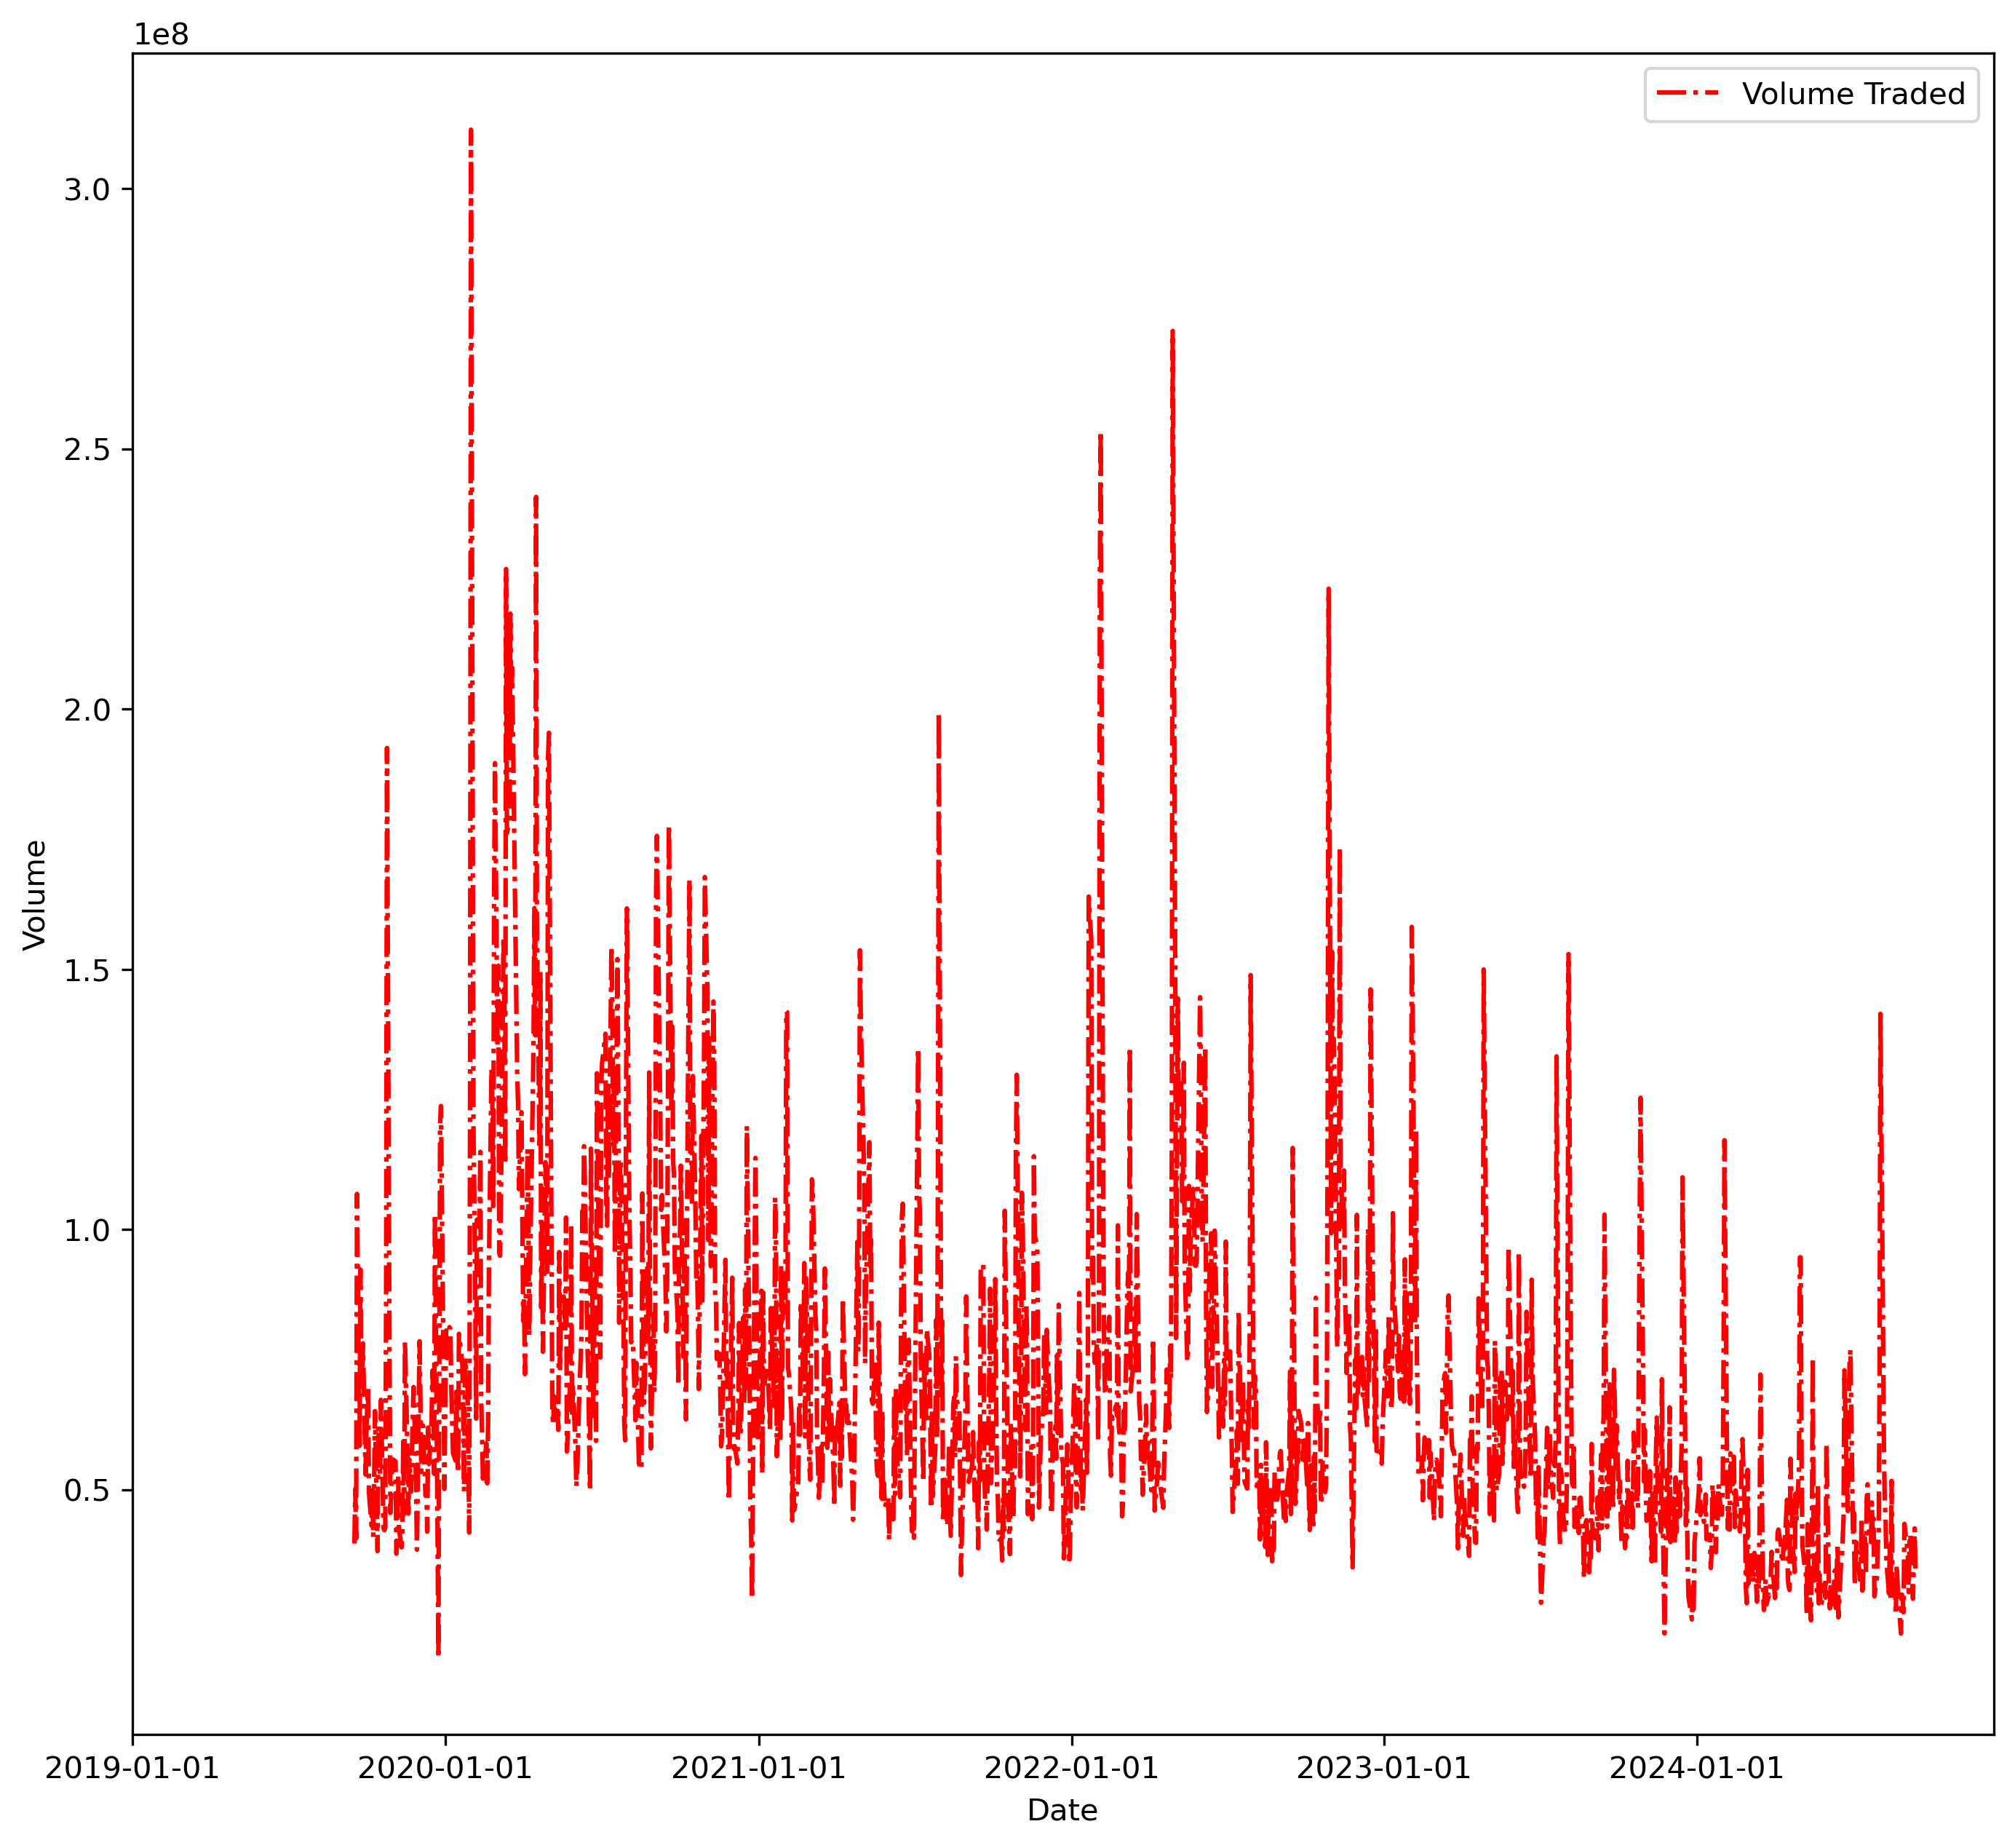

In [194]:
# Visualizing stock volume over time
plt.figure(figsize=(11,10), dpi = 300)
plt.plot(stock_data.index, stock_data['Volume'], 'r-.', label = 'Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(['2019','2020','2021','2022','2023','2024'])
plt.legend()
plt.show()

### Calculations 

In [201]:
stock_data['Price change'] = stock_data['Adj Close'].pct_change()*100
print(stock_data[['Adj Close', 'Price change']].head())

            Adj Close  Price change
Date                               
2019-09-18  90.873001           NaN
2019-09-19  91.074997      0.222284
2019-09-20  89.708000     -1.500957
2019-09-23  89.264999     -0.493825
2019-09-24  87.080498     -2.447210


In [205]:
short_window=int(input("Enter the short window (e.g 50 days): "))
long_window=int(input("Enter the long window (e.g 200 days): "))

stock_data['Short MA'] = stock_data['Adj Close'].rolling(window=short_window).mean()
stock_data['Long MA'] = stock_data['Adj Close'].rolling(window=long_window).mean()
print(stock_data[['Adj Close', 'Short MA']].head())
print(stock_data[['Adj Close', 'Long MA']].head())

Enter the short window (e.g 50 days):  50
Enter the long window (e.g 200 days):  200


            Adj Close  Short MA
Date                           
2019-09-18  90.873001       NaN
2019-09-19  91.074997       NaN
2019-09-20  89.708000       NaN
2019-09-23  89.264999       NaN
2019-09-24  87.080498       NaN
            Adj Close  Long MA
Date                          
2019-09-18  90.873001      NaN
2019-09-19  91.074997      NaN
2019-09-20  89.708000      NaN
2019-09-23  89.264999      NaN
2019-09-24  87.080498      NaN


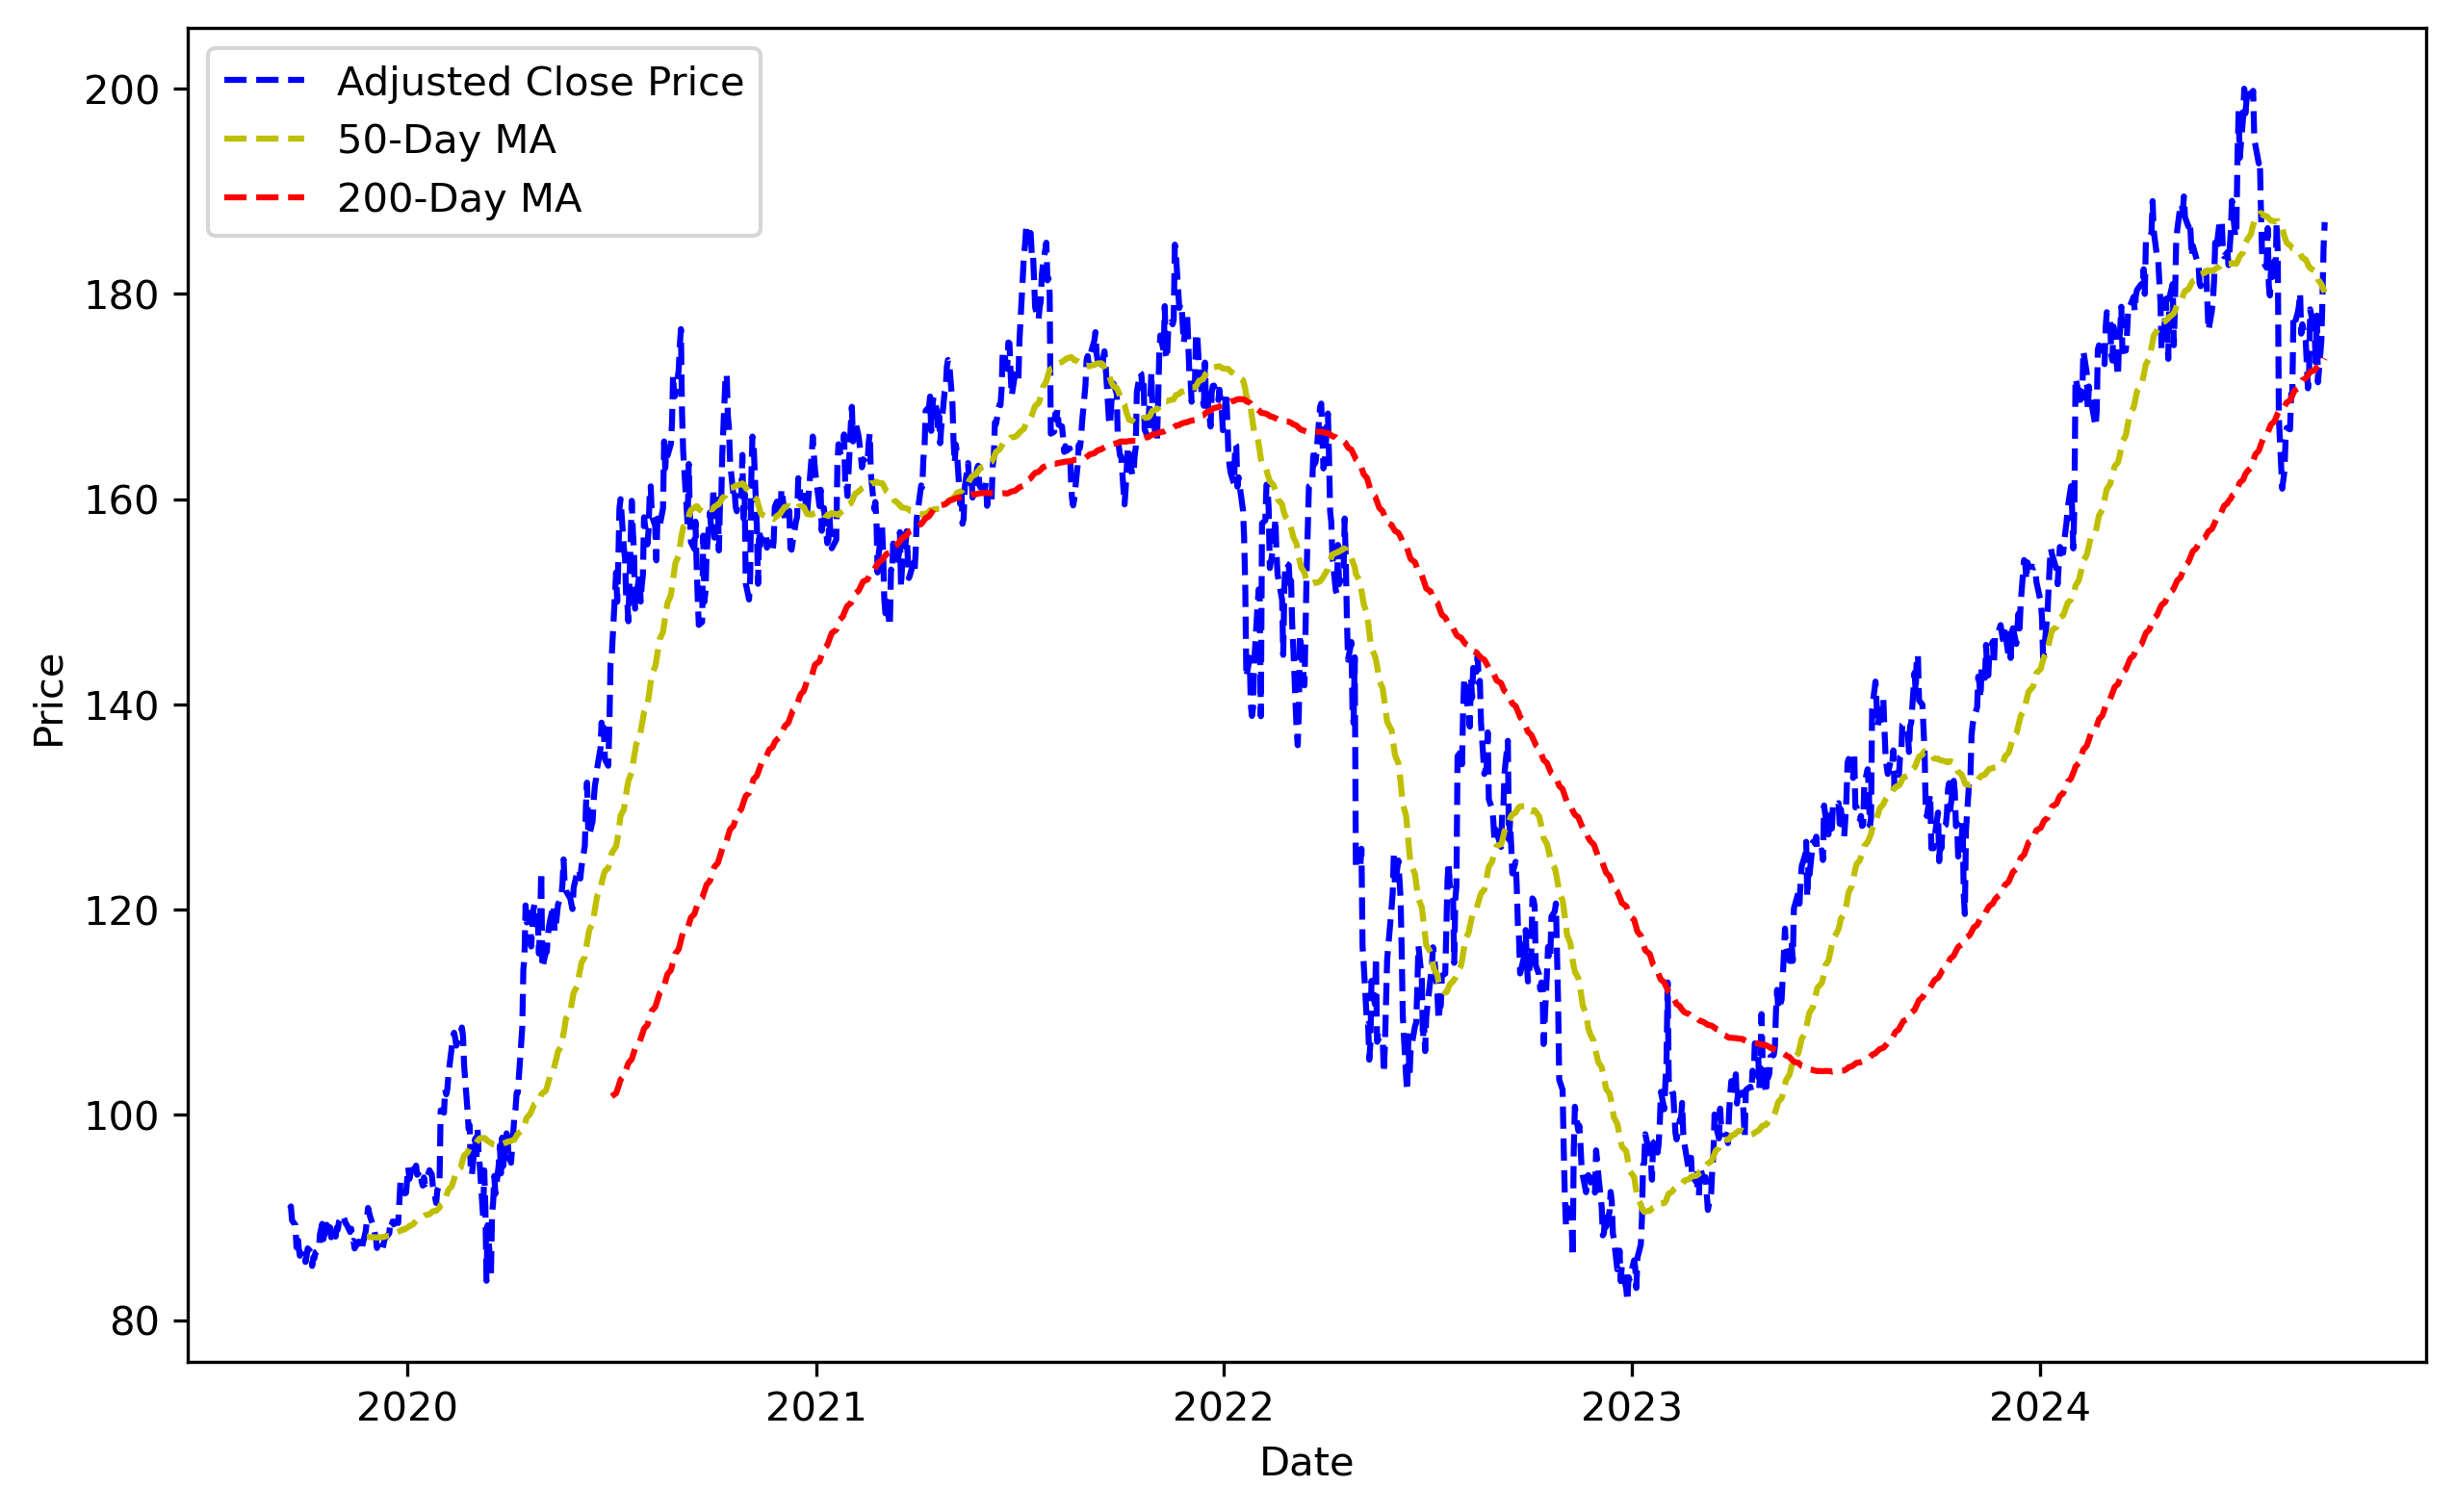

In [207]:
# plot stock price and moving averages
plt.figure(figsize=(10,6), dpi = 300)
plt.plot(stock_data.index, stock_data['Adj Close'], 'b--', label = 'Adjusted Close Price')
plt.plot(stock_data.index, stock_data['Short MA'], 'y--', label = f'{short_window}-Day MA')
plt.plot(stock_data.index, stock_data['Long MA'], 'r--', label = f'{long_window}-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [213]:
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
daily_return_avg = stock_data['Daily Return'].mean()
print(f"the daily return average for {ticker}: is {daily_return_avg: 4f}")

the daily return average for AMZN: is  0.000827


### Visualizing Trend Frequency

In [215]:
stock_data['Trend'] = stock_data['Daily Return'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
print(stock_data[['Adj Close', 'Daily Return', 'Trend']].head())

            Adj Close  Daily Return     Trend
Date                                         
2019-09-18  90.873001           NaN  Negative
2019-09-19  91.074997      0.002223  Positive
2019-09-20  89.708000     -0.015010  Negative
2019-09-23  89.264999     -0.004938  Negative
2019-09-24  87.080498     -0.024472  Negative


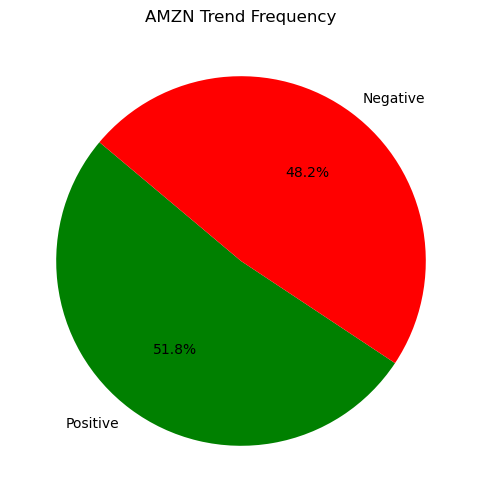

In [220]:
trend_counts = stock_data['Trend'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title(f"{ticker} Trend Frequency")
plt.show()

Enter other stock tickers to compare (comma-separated):  AAPL, GME, GOOG, MSFT


[*********************100%***********************]  5 of 5 completed

3 Failed downloads:
[' MSFT', ' GME', ' GOOG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\vyeli\AppData\Local\Temp\ipykernel_19868\3049533286.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  multi_stock_returns = multi_stock_data.pct_change()


Ticker   GME   GOOG   MSFT      AAPL      AMZN
Ticker                                        
 GME     NaN    NaN    NaN       NaN       NaN
 GOOG    NaN    NaN    NaN       NaN       NaN
 MSFT    NaN    NaN    NaN       NaN       NaN
AAPL     NaN    NaN    NaN  1.000000  0.596531
AMZN     NaN    NaN    NaN  0.596531  1.000000


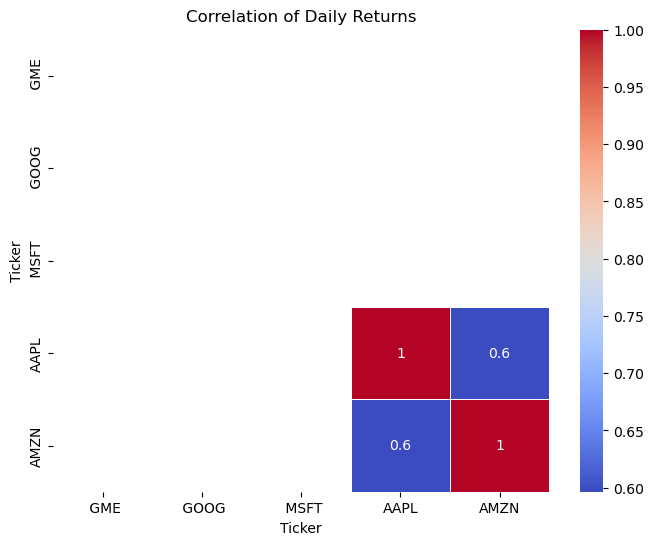

In [224]:
other_tickers = input("Enter other stock tickers to compare (comma-separated): ").upper().split(',')
all_tickers = [ticker] + other_tickers

# Download stock data for all tickers
multi_stock_data = yf.download(all_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for all stocks
multi_stock_returns = multi_stock_data.pct_change()

# Calculate the correlation matrix
correlation_matrix = multi_stock_returns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Daily Returns')
plt.show()